In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# roc curve

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową.

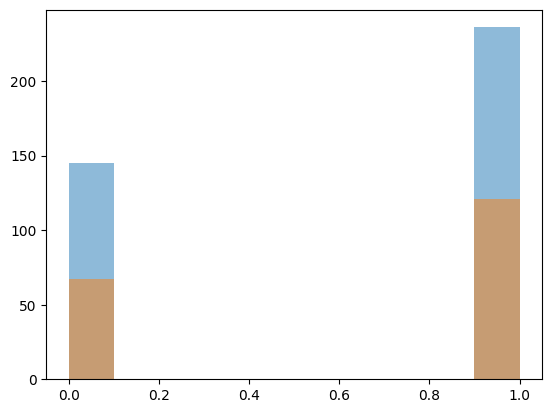

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

Zad.
Naucz 

* SVC()
* SVC(C=1, gamma=0.00001)
* LogisticRegression(C=1)

Dla wszystkich modleli wylicz:

* precision    
* recall  
* f1-score
* accuracy
* roc_auc_score

i narysuj krzywą roc

In [13]:
def score_model(model):
    y_pred = model.predict(X_test)

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

In [22]:
models = {
    'SVC': SVC(probability=True),
    'SVC(C=1, γ=0.00001)': SVC(C=1, gamma=0.00001, probability=True),
    'LR(C=1)': LogisticRegression(C=1, max_iter=10_000)
}

df = pd.DataFrame(columns=["name", "precision", "recall", "f1", "accuracy"])

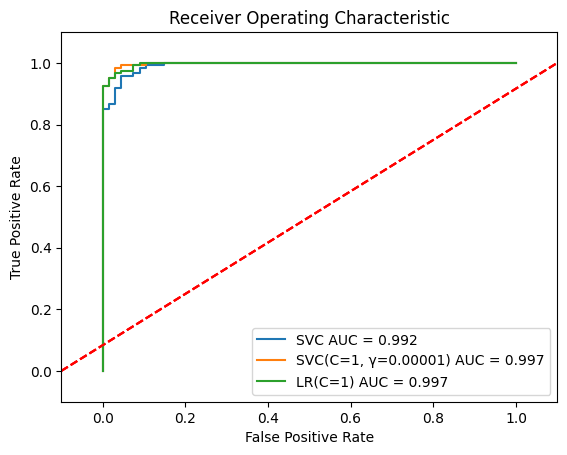

In [31]:
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    df.loc[i] = [name, *score_model(model)]

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label=f"{name} AUC = {roc_auc:.3f}")
    plt.legend(loc='lower right')
    plt.plot([-0.1, 1.1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

In [18]:
df

,name,precision,recall,f1,accuracy
0,SVC,0.937500,0.991736,0.963855,0.952128
1,"SVC(C=1, gamma=0.00001)",0.944882,0.991736,0.967742,0.957447
2,LogisticRegression(C=1),0.983193,0.966942,0.975000,0.968085
